In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
scaler = StandardScaler()

In [10]:
dummy_data = pd.get_dummies(data = df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [11]:
dummy_data['charges']= dummy_data['charges'].apply(lambda x: 1 if x> 25000 else 0)

In [12]:
df['charges']= df['charges'].apply(lambda x: 1 if x> 1121 else 0)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,1
1,18,male,33.770,1,no,southeast,1
2,28,male,33.000,3,no,southeast,1
3,33,male,22.705,0,no,northwest,1
4,32,male,28.880,0,no,northwest,1


In [13]:
dummy_data['charges'].value_counts()

0    1137
1     201
Name: charges, dtype: int64

In [14]:
X = dummy_data.drop('charges', axis = 1)
y = dummy_data['charges']

In [15]:
correlations= dummy_data.corr()

<AxesSubplot:>

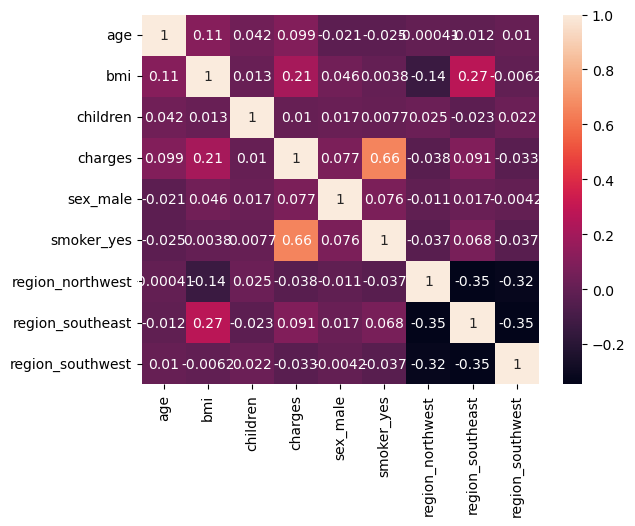

In [16]:
import seaborn as sns
sns.heatmap(correlations, annot = True)

In [17]:
dummy_data= dummy_data.drop(columns=['region_northwest', 'region_southeast', 'region_southwest'])

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.5)

In [19]:
KNN = KNeighborsClassifier()

In [20]:
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier()
parameters = {'n_neighbors': range(3, 16, 2), 'weights':['uniform', 'distance']}
clf=GridSearchCV(knn_grid, parameters)
clf.fit(X_train, y_train)
pred_grid=clf.predict(X_test)
accuracy_grid= accuracy_score(pred_grid, y_test)
print(accuracy_grid)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8385650224215246


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

In [22]:
clf.best_score_

0.8579845135226124

In [23]:
clf.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [24]:
new_knn = clf.best_estimator_
new_pred=new_knn.predict(X_train)
new_accuracy=accuracy_score(new_pred, y_train)
print(new_accuracy)

0.866965620328849


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
clf.best_score_

0.8579845135226124

Not necessarily.

We will imporve by doing the minmax scaler since that should perform later. 

In [26]:
mms = MinMaxScaler()
X_train_scaled= mms.fit_transform(X_train)
X_test_scaled=mms.transform(X_test)

In [27]:
clf.best_score_

0.8579845135226124